In [74]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
import random
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/all-seasons-full/all_seasons_data (1).csv


In [75]:
def change_for_machine_learning(df):
    new_df = df.copy()
    for column in df.columns:
        if df[column].dtype != int and df[column].dtype != float:
            new_df[column] = new_df[column].astype('category')
            new_df[column] = new_df[column].cat.codes
    return new_df


def new_maps(df1, value1, df2, value2):
    codes = df1[value1]
    names = df2[value2]
    code_name_map = dict(zip(codes, names))
    return code_name_map


def has_docstring(func):
    """Check to see if the function  has a docstring.

    Args:
      func (callable): A function.

    Returns:
      bool
    """
    return func.__doc__ is not None


has_dc = has_docstring(has_docstring)

if not has_dc:
    display("has_docstring() doesn't have a docstring!")
else:
    display("has_docstring() looks ok")
    

def opponent_search(value):
    display(all_seasons.opp_id.sort_values().unique())
    results = all_seasons[all_seasons['opp_id'].str.contains(value, case=False)].drop('stand_dev_talons', axis=1)
    if len(results) == 0:
        raise ValueError("No team IDs found. Please choose from the list above.")
    else:
        results=results
    return results


def create_dict(range_num, key_data, key_column, value_data, value_column):
    """Create a dictionary containing a number of 'key: value' pairs.

  Args:
    range_num (int): Range the loop will run over
    key_data (variable): Dataset the keys will be pulled from.
    key_column (variable): Dataset column the keys will be pulled from.
    value_data (variable): Dataset the values will be pulled from.
    value_column (variable): Dataset column the values will be pulled from.

  Returns:
    dict
  """
    new_dict = {}
    for i in range(range_num):
        new_dict[key_data[key_column][i]] = value_data[value_column][i]
    return new_dict


def sample_append(range_num, append_to, data, column):
    """Create a list of average values based on the dataset.

  Args:
    range_num (int): Range the loop will run over.
    append_to (list): Empty list that data will be appended to.
    data (Dataframe): Dataset to be sampled from.
    column (Series): Dataframe column used in the sample.

  Returns:
    list
  """
    for i in range(range_num):
        append_to.append(
        np.mean(data.sample(frac=1, replace=True)[column])
    )
    return append_to

'has_docstring() looks ok'

In [76]:
all_seasons = pd.read_csv('/kaggle/input/all-seasons-full/all_seasons_data (1).csv')

In [77]:
all_seasons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1066 entries, 0 to 1065
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Game              1066 non-null   int64  
 1   opponent          1066 non-null   object 
 2   home_away         1066 non-null   object 
 3   talons_score      1066 non-null   int64  
 4   opp_score         1066 non-null   int64  
 5   season            1066 non-null   int64  
 6   score_diff        1066 non-null   int64  
 7   result            1066 non-null   object 
 8   conference        1066 non-null   object 
 9   division          1066 non-null   object 
 10  rivalry           1066 non-null   object 
 11  stand_dev_talons  1066 non-null   float64
 12  game_ending       1066 non-null   object 
dtypes: float64(1), int64(5), object(7)
memory usage: 108.4+ KB


In [78]:
all_seasons['opponent'] = all_seasons['opponent'].astype('string')
change_team_names = all_seasons['opponent'].str.split(' ', expand=True)
change_team_names.columns = ['opp_id','opp_name']
change_team_names

,opp_id,opp_name
0,NY,Knicks
1,POR,Blazers
2,WAS,Wizards
3,NY,Knicks
4,LA,Lakers
...,...,...
1061,IND,Pacers
1062,SAN,Spurs
1063,NY,Knicks
1064,BKN,Nets


In [79]:
all_seasons.drop(columns=['opponent'], inplace=True)
all_seasons['opp_id'] = change_team_names['opp_id'].astype('string')
all_seasons['opp_name'] = change_team_names['opp_name'].astype('category')
all_seasons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1066 entries, 0 to 1065
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Game              1066 non-null   int64   
 1   home_away         1066 non-null   object  
 2   talons_score      1066 non-null   int64   
 3   opp_score         1066 non-null   int64   
 4   season            1066 non-null   int64   
 5   score_diff        1066 non-null   int64   
 6   result            1066 non-null   object  
 7   conference        1066 non-null   object  
 8   division          1066 non-null   object  
 9   rivalry           1066 non-null   object  
 10  stand_dev_talons  1066 non-null   float64 
 11  game_ending       1066 non-null   object  
 12  opp_id            1066 non-null   string  
 13  opp_name          1066 non-null   category
dtypes: category(1), float64(1), int64(5), object(6), string(1)
memory usage: 110.8+ KB


In [80]:
all_seasons.loc[all_seasons['opp_name'] == 'Lakers', 'opp_id'] = 'LAL'
all_seasons.loc[all_seasons['opp_name'] == 'Clippers', 'opp_id'] = 'LAC'

In [81]:
display(all_seasons.columns)
update_column_names = ['season','Game','opp_id','opp_name','talons_score','opp_score','score_diff','home_away','result','conference','division','rivalry',
       'game_ending','stand_dev_talons']
all_seasons = all_seasons.reindex(columns=update_column_names)
display(all_seasons.head())

Index(['Game', 'home_away', 'talons_score', 'opp_score', 'season',
       'score_diff', 'result', 'conference', 'division', 'rivalry',
       'stand_dev_talons', 'game_ending', 'opp_id', 'opp_name'],
      dtype='object')

,season,Game,opp_id,opp_name,talons_score,opp_score,score_diff,home_away,result,conference,division,rivalry,game_ending,stand_dev_talons
0,2028,1,NY,Knicks,136,94,42,A,win,eastern,atlantic,Y,blowout win,14.405006
1,2028,2,POR,Blazers,142,49,93,H,win,western,northwest,N,blowout win,15.953201
2,2028,3,WAS,Wizards,128,74,54,H,win,eastern,atlantic,N,blowout win,14.929784
3,2028,4,NY,Knicks,116,99,17,H,win,eastern,atlantic,Y,win,14.405006
4,2028,5,LAL,Lakers,127,94,33,H,win,western,pacific,N,blowout win,10.300187


In [82]:
all_seasons['talons_z'] = (all_seasons.talons_score - all_seasons.talons_score.mean()) / all_seasons.talons_score.std()
display(all_seasons.columns)

all_seasons.value_counts('opp_id')

Index(['season', 'Game', 'opp_id', 'opp_name', 'talons_score', 'opp_score',
       'score_diff', 'home_away', 'result', 'conference', 'division',
       'rivalry', 'game_ending', 'stand_dev_talons', 'talons_z'],
      dtype='object')

opp_id
VIR     46
CHA     45
ORL     45
ATL     44
MIA     44
BOS     38
PHI     37
BAL     36
NY      35
BKN     34
DET     31
TOR     29
CHI     28
CLE     27
NAS     27
IND     27
LAL     26
PHX     26
DAL     26
UTA     26
DEN     26
STL     26
SAN     26
SAC     26
POR     26
GS      26
MEM     26
HOU     26
OKC     26
NOLA    26
KC      26
MIN     26
MIL     26
WAS     26
LAC     25
dtype: int64

In [83]:
from statsmodels.formula.api import ols

In [84]:
all_seasons.head()

,season,Game,opp_id,opp_name,talons_score,opp_score,score_diff,home_away,result,conference,division,rivalry,game_ending,stand_dev_talons,talons_z
0,2028,1,NY,Knicks,136,94,42,A,win,eastern,atlantic,Y,blowout win,14.405006,1.680191
1,2028,2,POR,Blazers,142,49,93,H,win,western,northwest,N,blowout win,15.953201,2.109673
2,2028,3,WAS,Wizards,128,74,54,H,win,eastern,atlantic,N,blowout win,14.929784,1.107548
3,2028,4,NY,Knicks,116,99,17,H,win,eastern,atlantic,Y,win,14.405006,0.248584
4,2028,5,LAL,Lakers,127,94,33,H,win,western,pacific,N,blowout win,10.300187,1.035968


<Axes: xlabel='Game', ylabel='talons_score'>

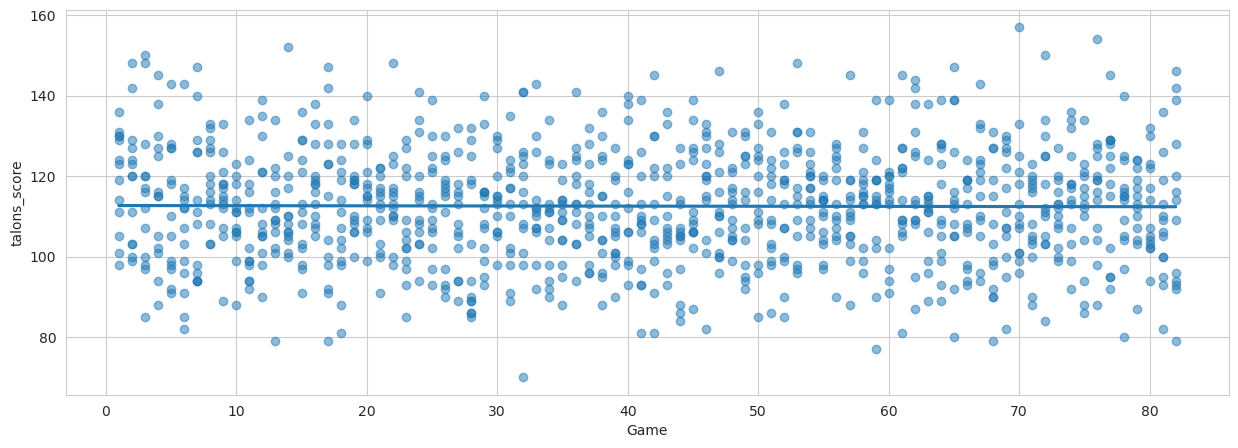

In [85]:
plt.figure(figsize=(15, 5))
sns.set_style('whitegrid')
sns.regplot(data=all_seasons, x='Game', y='talons_score', ci=0.1, scatter_kws={'alpha': 0.5})

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


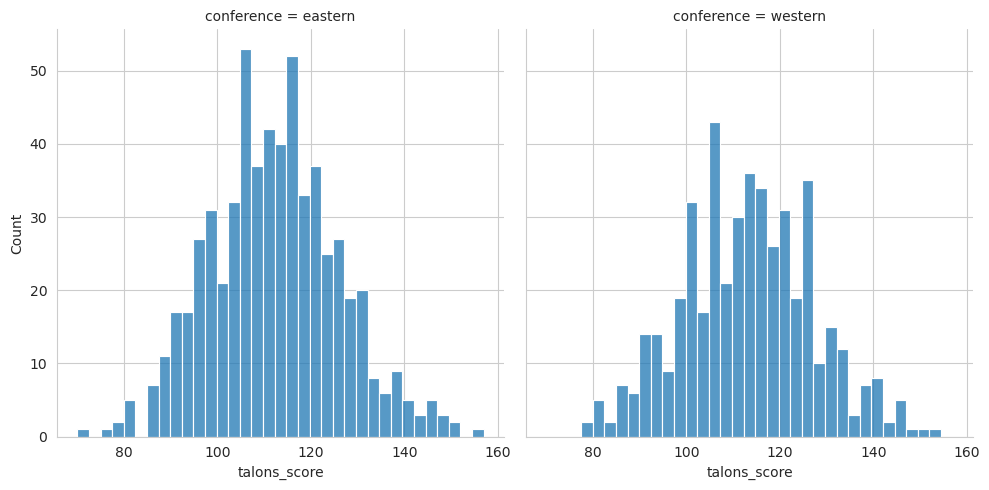

In [86]:
sns.displot(data=all_seasons, x='talons_score', bins=35, col='conference')

In [87]:
mean_score_by_season = all_seasons.groupby('season')['talons_score'].mean().round(1)
mean_score_by_season

season
2028    113.3
2029    118.5
2030    120.4
2031    114.6
2032    114.7
2033    114.6
2034    110.4
2035    110.2
2036    109.6
2037    110.4
2038    112.3
2039    105.7
2040    108.4
Name: talons_score, dtype: float64

In [88]:
all_seasons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1066 entries, 0 to 1065
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   season            1066 non-null   int64   
 1   Game              1066 non-null   int64   
 2   opp_id            1066 non-null   string  
 3   opp_name          1066 non-null   category
 4   talons_score      1066 non-null   int64   
 5   opp_score         1066 non-null   int64   
 6   score_diff        1066 non-null   int64   
 7   home_away         1066 non-null   object  
 8   result            1066 non-null   object  
 9   conference        1066 non-null   object  
 10  division          1066 non-null   object  
 11  rivalry           1066 non-null   object  
 12  game_ending       1066 non-null   object  
 13  stand_dev_talons  1066 non-null   float64 
 14  talons_z          1066 non-null   float64 
dtypes: category(1), float64(2), int64(5), object(6), string(1)
memory usage:

In [89]:
samples = all_seasons.sample(frac=1/30, replace=False)
samples

,season,Game,opp_id,opp_name,talons_score,opp_score,score_diff,home_away,result,conference,division,rivalry,game_ending,stand_dev_talons,talons_z
565,2034,74,SAC,Kings,114,77,37,A,win,western,pacific,N,blowout win,12.347282,0.105423
403,2032,76,MIA,Heat,107,89,18,A,win,eastern,southeast,N,win,16.072510,-0.395639
701,2036,46,CHA,Hornets,101,106,5,A,loss,eastern,southeast,Y,Loss,14.175844,-0.825121
751,2037,14,TOR,Raptors,105,93,12,A,win,eastern,central,N,win,13.606902,-0.538800
1064,2040,81,BKN,Nets,100,109,9,H,loss,eastern,atlantic,N,Loss,13.669677,-0.896702
928,2039,27,IND,Pacers,94,101,7,A,loss,eastern,central,N,Loss,12.086347,-1.326184
573,2034,82,MIL,Bucks,116,98,18,H,win,western,northwest,N,win,14.171749,0.248584
126,2029,45,CHA,Hornets,139,93,46,A,win,eastern,southeast,Y,blowout win,14.175844,1.894932
700,2036,45,SAC,Kings,111,91,20,H,win,western,pacific,N,win,12.347282,-0.109318
417,2033,8,POR,Blazers,103,100,3,H,win,western,northwest,N,one_score win,15.953201,-0.681961


In [90]:
talons_model = ols('talons_score ~ score_diff', data=samples)
talons_model = talons_model.fit()

opps_model = ols('opp_score ~ score_diff', data=samples)
opps_model = opps_model.fit()
talons_model.params, opps_model.params

(Intercept     101.703971
 score_diff      0.652116
 dtype: float64,
 Intercept     107.399308
 score_diff     -0.466729
 dtype: float64)

In [91]:
explanatory_data = pd.DataFrame({'score_diff': np.arange(0 , 70, 2)})

In [92]:
prediction_data = explanatory_data.assign(talons_score = talons_model.predict(explanatory_data))
display(prediction_data.info())
display(all_seasons[['score_diff','talons_score']].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   score_diff    35 non-null     int64  
 1   talons_score  35 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 688.0 bytes


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1066 entries, 0 to 1065
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   score_diff    1066 non-null   int64
 1   talons_score  1066 non-null   int64
dtypes: int64(2)
memory usage: 16.8 KB


None

<Figure size 640x480 with 0 Axes>

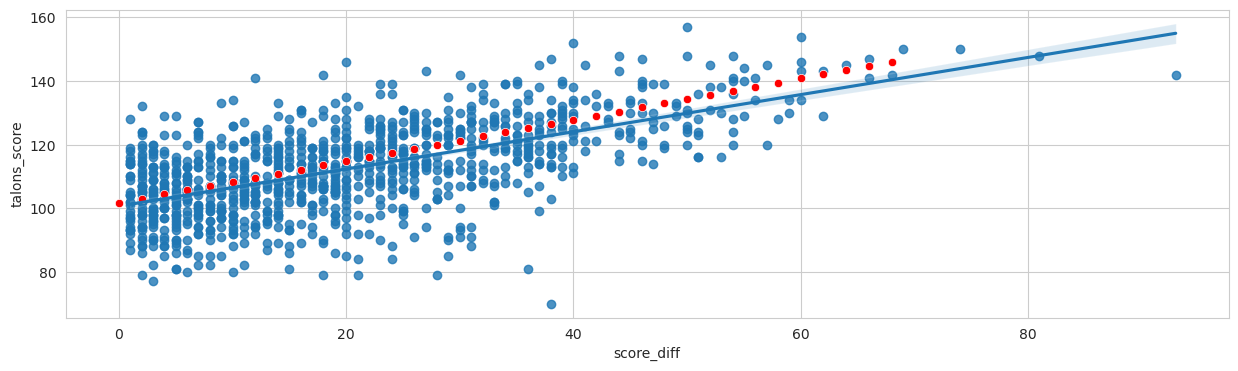

In [93]:
fig = plt.figure()
plt.figure(figsize=(15, 4))
sns.set_style('whitegrid')
sns.regplot(x="score_diff",  y="talons_score", data=all_seasons)

sns.scatterplot(x="score_diff",  y="talons_score",  data=prediction_data, color='red')

plt.show()

In [94]:
prediction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   score_diff    35 non-null     int64  
 1   talons_score  35 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 688.0 bytes


In [95]:
bootstrap_1 = all_seasons.sample(frac=1/5, replace=True)
bootstrap_1

,season,Game,opp_id,opp_name,talons_score,opp_score,score_diff,home_away,result,conference,division,rivalry,game_ending,stand_dev_talons,talons_z
66,2028,67,STL,Sound,96,88,8,A,win,western,northwest,N,win,8.238092,-1.183023
518,2034,27,WAS,Wizards,105,98,7,H,win,eastern,atlantic,N,win,14.929784,-0.538800
913,2039,12,DEN,Nuggets,105,103,2,A,win,western,northwest,N,one_score win,16.044170,-0.538800
1062,2040,79,SAN,Spurs,122,109,13,H,win,western,southwest,N,win,15.570979,0.678066
344,2032,17,MIL,Bucks,98,95,3,A,win,western,northwest,N,one_score win,14.171749,-1.039862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,2030,77,TOR,Raptors,128,95,33,H,win,eastern,central,N,blowout win,13.606902,1.107548
435,2033,26,ORL,Magic,119,118,1,A,win,eastern,southeast,Y,one_score win,11.400957,0.463325
718,2036,63,BOS,Celtics,138,101,37,H,win,eastern,atlantic,N,blowout win,13.511309,1.823352
681,2036,26,LAL,Lakers,111,95,16,H,win,western,pacific,N,win,10.300187,-0.109318


In [96]:
mean_z_score = np.mean(samples['talons_z'])
mean_z_score

0.08752813076130549

In [97]:
z_score_35 = []
for i in range(35):
    z_score_35.append(
        np.mean(samples.sample(frac=1, replace=True)['talons_z'])
    )


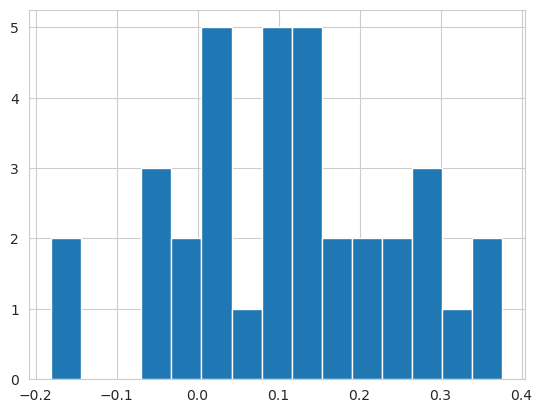

In [98]:
plt.hist(z_score_35, bins=15)
plt.show()

In [99]:
pop = all_seasons.sample(n=150, random_state=3456543)

# Calculate the mean duration in mins from spotify_population
mean_pop = all_seasons.talons_score.mean() 

# Calculate the mean duration in mins from spotify_sample
mean_samp = pop.talons_score.mean()
[mean_pop, mean_samp]

[112.52720450281426, 112.86]

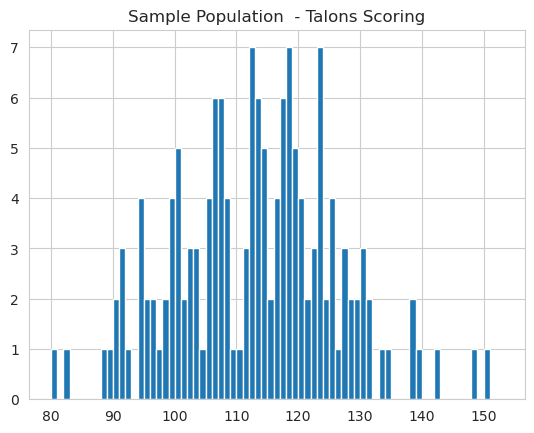

In [100]:
pop.talons_score.hist(bins=np.arange(pop.talons_score.min(), pop.talons_score.max(), 1))
plt.title('Sample Population  - Talons Scoring')
plt.show()

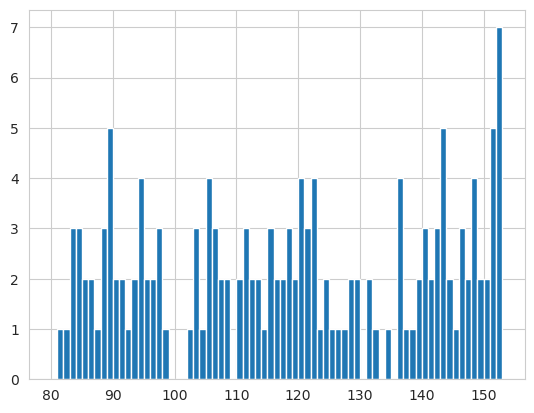

In [101]:
uniforms = np.random.uniform(low=pop.talons_score.min(), high=pop.talons_score.max(), size=pop.talons_score.max())
plt.hist(uniforms, bins=np.arange(pop.talons_score.min(), pop.talons_score.max(), 1))
plt.show()

In [102]:
# Set the sample size to 70
sample_size = 70

# Calculate the population size from attrition_pop
pop_size = len(all_seasons)

# Calculate the interval
interval = pop_size // sample_size
interval

15

In [103]:
new_samp = all_seasons.iloc[::interval]

# Print the sample
new_samp

,season,Game,opp_id,opp_name,talons_score,opp_score,score_diff,home_away,result,conference,division,rivalry,game_ending,stand_dev_talons,talons_z
0,2028,1,NY,Knicks,136,94,42,A,win,eastern,atlantic,Y,blowout win,14.405006,1.680191
15,2028,16,VIR,Storm,120,82,38,A,win,eastern,southeast,N,blowout win,13.684382,0.534905
30,2028,31,MIA,Heat,89,90,1,H,loss,eastern,southeast,N,Loss,16.072510,-1.684086
45,2028,46,STL,Sound,115,95,20,H,win,western,northwest,N,win,8.238092,0.177004
60,2028,61,GS,Warriors,108,73,35,A,win,western,pacific,Y,blowout win,15.367698,-0.324059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,2040,22,PHI,76ers,112,83,29,H,win,eastern,atlantic,N,blowout win,15.642208,-0.037737
1020,2040,37,TOR,Raptors,116,90,26,H,win,eastern,central,N,blowout win,13.606902,0.248584
1035,2040,52,DEN,Nuggets,118,96,22,H,win,western,northwest,N,blowout win,16.044170,0.391745
1050,2040,67,MEM,Grizzlies,143,116,27,A,win,western,southwest,N,blowout win,14.480172,2.181253


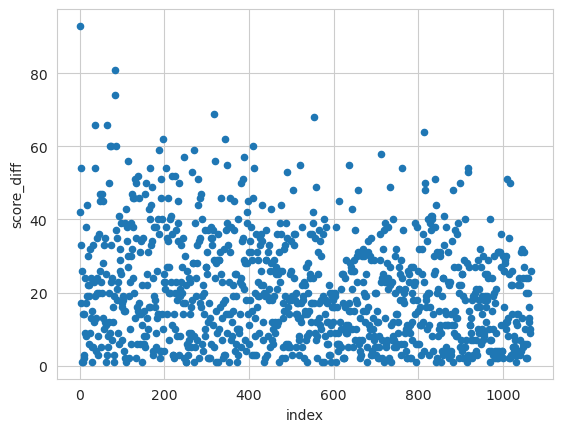

In [104]:
all_seasons_new_ind = all_seasons.reset_index()
all_seasons_new_ind.plot(x='index', y='score_diff', kind='scatter')
plt.show()

In [105]:
ids = list(all_seasons['opp_id'].unique())
choose_randoms = random.sample(ids, k=5)

condition = all_seasons['opp_id'].isin(choose_randoms)
use_condition = all_seasons[condition]
use_condition

,season,Game,opp_id,opp_name,talons_score,opp_score,score_diff,home_away,result,conference,division,rivalry,game_ending,stand_dev_talons,talons_z
6,2028,7,ATL,Hawks,114,88,26,H,win,eastern,southeast,Y,blowout win,12.280289,0.105423
7,2028,8,MEM,Grizzlies,116,115,1,A,win,western,southwest,N,one_score win,14.480172,0.248584
22,2028,23,BOS,Celtics,109,90,19,H,win,eastern,atlantic,N,win,13.511309,-0.252479
23,2028,24,ATL,Hawks,103,97,6,A,win,eastern,southeast,Y,win,12.280289,-0.681961
27,2028,28,CHI,Bulls,89,102,13,H,loss,eastern,central,N,Loss,14.879765,-1.684086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028,2040,45,CHI,Bulls,124,117,7,A,win,eastern,central,N,win,14.879765,0.821227
1034,2040,51,BOS,Celtics,114,100,14,H,win,eastern,atlantic,N,win,13.511309,0.105423
1036,2040,53,MEM,Grizzlies,109,95,14,H,win,western,southwest,N,win,14.480172,-0.252479
1050,2040,67,MEM,Grizzlies,143,116,27,A,win,western,southwest,N,blowout win,14.480172,2.181253


In [106]:
result_samp = (all_seasons['game_ending'] == 'one_score win').mean()
result_samp

0.06097560975609756

In [107]:
result_hypothesis = 0.05

In [108]:
samples

,season,Game,opp_id,opp_name,talons_score,opp_score,score_diff,home_away,result,conference,division,rivalry,game_ending,stand_dev_talons,talons_z
565,2034,74,SAC,Kings,114,77,37,A,win,western,pacific,N,blowout win,12.347282,0.105423
403,2032,76,MIA,Heat,107,89,18,A,win,eastern,southeast,N,win,16.072510,-0.395639
701,2036,46,CHA,Hornets,101,106,5,A,loss,eastern,southeast,Y,Loss,14.175844,-0.825121
751,2037,14,TOR,Raptors,105,93,12,A,win,eastern,central,N,win,13.606902,-0.538800
1064,2040,81,BKN,Nets,100,109,9,H,loss,eastern,atlantic,N,Loss,13.669677,-0.896702
928,2039,27,IND,Pacers,94,101,7,A,loss,eastern,central,N,Loss,12.086347,-1.326184
573,2034,82,MIL,Bucks,116,98,18,H,win,western,northwest,N,win,14.171749,0.248584
126,2029,45,CHA,Hornets,139,93,46,A,win,eastern,southeast,Y,blowout win,14.175844,1.894932
700,2036,45,SAC,Kings,111,91,20,H,win,western,pacific,N,win,12.347282,-0.109318
417,2033,8,POR,Blazers,103,100,3,H,win,western,northwest,N,one_score win,15.953201,-0.681961


mean_talons_score_full = []
for i in range(len(bootstrap_1)):
    mean_talons_score_full.append(
        np.mean(bootstrap_1.sample(frac=1, replace=True)['talons_score'])
    )

mean_opp_score_full = []
for i in range(len(bootstrap_1)):
    mean_opp_score_full.append(
        np.mean(bootstrap_1.sample(frac=1, replace=True)['opp_score'])
    )
    

In [109]:
mean_talons_score_full = []
mean_opp_score_full = []

In [110]:
mean_talons_score_full = sample_append(len(bootstrap_1), mean_talons_score_full, bootstrap_1, 'talons_score')
mean_opp_score_full = sample_append(len(bootstrap_1), mean_opp_score_full, bootstrap_1, 'opp_score')

In [111]:
lower = np.quantile(bootstrap_1.talons_score, 0.025)
upper = np.quantile(bootstrap_1.talons_score, 0.975)
lower, upper

(86.0, 140.7)

In [112]:
bootstrap_1.columns

Index(['season', 'Game', 'opp_id', 'opp_name', 'talons_score', 'opp_score',
       'score_diff', 'home_away', 'result', 'conference', 'division',
       'rivalry', 'game_ending', 'stand_dev_talons', 'talons_z'],
      dtype='object')

<Axes: xlabel='Game', ylabel='talons_score'>

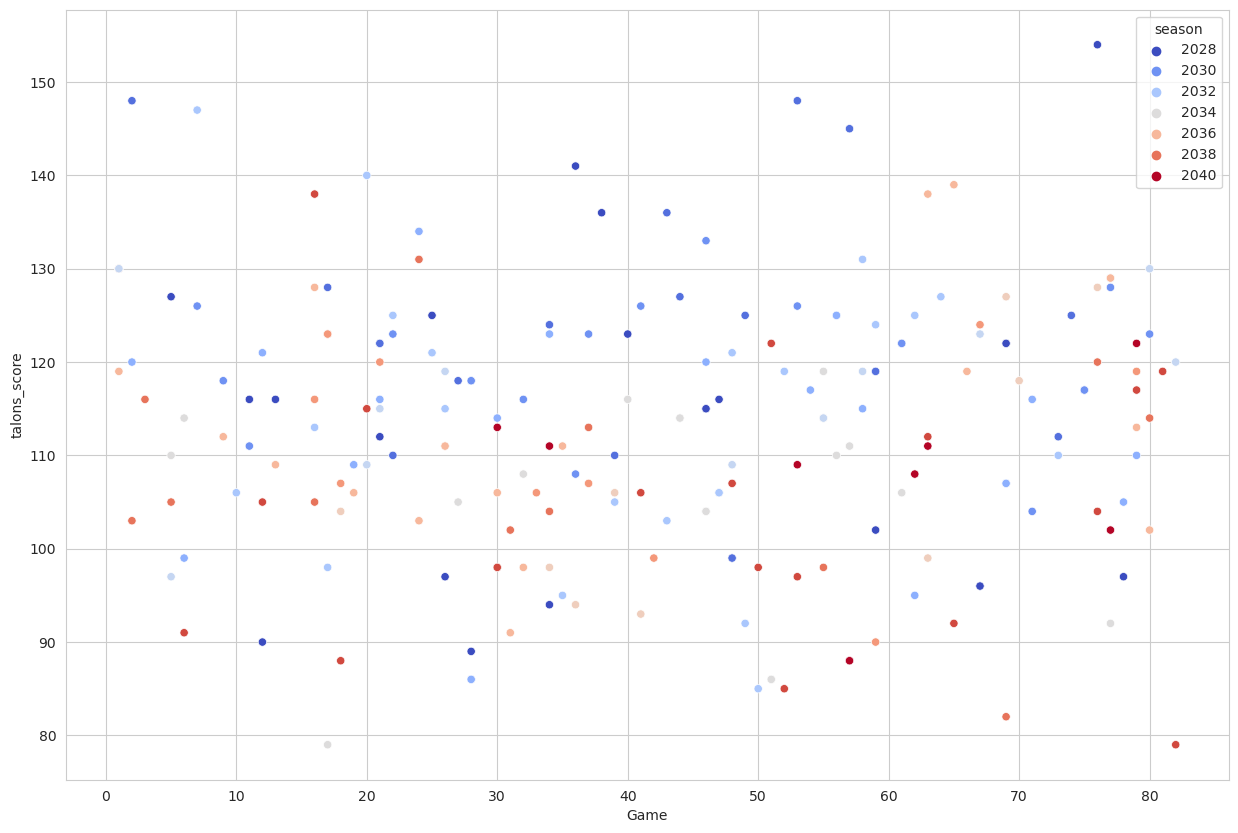

In [113]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x='Game', y='talons_score', data=bootstrap_1, hue='season', palette='coolwarm')

In [114]:
id_names_dict = create_dict(35, all_seasons, 'opp_id', all_seasons, 'opp_name')
id_names_dict

{'NY': 'Knicks',
 'POR': 'Blazers',
 'WAS': 'Wizards',
 'LAL': 'Lakers',
 'UTA': 'Jazz',
 'ATL': 'Hawks',
 'MEM': 'Grizzlies',
 'DET': 'Pistons',
 'PHX': 'Suns',
 'SAC': 'Kings',
 'MIL': 'Bucks',
 'MIN': 'Timberwolves',
 'DAL': 'Mavericks',
 'VIR': 'Storm',
 'MIA': 'Heat',
 'CLE': 'Cavaliers',
 'LAC': 'Clippers',
 'BOS': 'Celtics',
 'BAL': 'Barons',
 'CHA': 'Hornets',
 'CHI': 'Bulls',
 'ORL': 'Magic',
 'KC': 'Knights'}

In [145]:
random_stats = all_seasons.sample(82, replace=False)
random_stats.tail(5)

,season,Game,opp_id,opp_name,talons_score,opp_score,score_diff,home_away,result,conference,division,rivalry,game_ending,stand_dev_talons,talons_z
1045,2040,62,SAC,Kings,108,95,13,A,win,western,pacific,N,win,12.347282,-0.324059
580,2035,7,ATL,Hawks,98,112,14,A,loss,eastern,southeast,Y,Loss,12.280289,-1.039862
462,2033,53,STL,Sound,115,106,9,H,win,western,northwest,N,win,8.238092,0.177004
369,2032,42,VIR,Storm,113,88,25,A,win,eastern,southeast,N,blowout win,13.684382,0.033843
45,2028,46,STL,Sound,115,95,20,H,win,western,northwest,N,win,8.238092,0.177004


In [146]:
calculations = change_for_machine_learning(random_stats)
calculations['game_ending_cat'] = random_stats['game_ending']

In [147]:
calculations.tail()

,season,Game,opp_id,opp_name,talons_score,opp_score,score_diff,home_away,result,conference,division,rivalry,game_ending,stand_dev_talons,talons_z,game_ending_cat
1045,2040,62,26,13,108,95,13,0,1,1,3,0,3,12.347282,-0.324059,win
580,2035,7,0,9,98,112,14,0,0,0,4,1,0,12.280289,-1.039862,Loss
462,2033,53,28,26,115,106,9,1,1,1,2,0,3,8.238092,0.177004,win
369,2032,42,30,29,113,88,25,0,1,0,4,0,1,13.684382,0.033843,blowout win
45,2028,46,28,26,115,95,20,1,1,1,2,0,3,8.238092,0.177004,win


In [148]:
calculations['game_ending_cat'].value_counts()

blowout win      42
win              27
Loss             11
one_score win     2
Name: game_ending_cat, dtype: int64

In [149]:
p_0 = 0.04

p_hat = (random_stats['game_ending'] == "one_score win").mean()

n = len(random_stats)

numerator = p_hat - p_0
denominator = np.sqrt(p_0 * (1 - p_0) / n)

z_score = numerator / denominator

p_value = 1 - norm.cdf(z_score)

p_value, p_0

(0.7646485037442954, 0.04)